In [185]:
import numpy as np
import math
import heapq

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import matplotlib.pyplot as plt
from a_star import maze_plot
import pickle
from shapely.geometry import Polygon, LineString
from shapely.geometry import Point
from magic import ordinator
import cv2


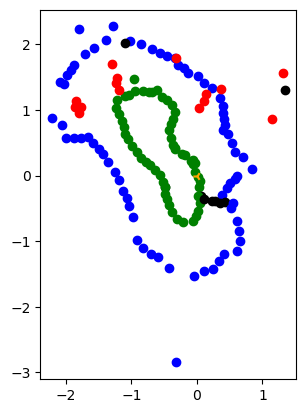

Missing 2 nodes to close the polygon; min_dist = 2.5830176518299472
Missing 1 nodes to close the polygon; min_dist = 0.70293141703667


In [186]:
with open(r"SLAM20240124_101335.pickle", "rb") as input_file:
    e = pickle.load(input_file)

positions = e['positions']
ids = e['ids']

for i, pos_zip in enumerate(zip(positions, ids)):
    col = pos_zip[1] % 3
    if col == 0:
        col2 = 'green'
    elif col == 1:
        col2 = 'red'
    elif col == 2:
        col2 = 'blue'
    if pos_zip[1] < 100:
        col2 = 'black'
    plt.scatter(*pos_zip[0], color=col2)

plt.scatter(0, 0, color='orange', marker='3',)
plt.gca().set_aspect('equal')
plt.show()


positions_array = np.array(positions)
positions_array = np.array(positions)

mask_external = (ids % 3 == 2) & (ids >= 100) & (ids <= 1000)
mask_internal = (ids % 3 == 0) & (ids >= 100) & (ids <= 1000)

ids_external = ids[mask_external]
ids_internal = ids[mask_internal]

positions_external = positions_array[mask_external]
positions_internal = positions_array[mask_internal]


pos_list_ext = [pos for pos in positions_external]
pos_list_int = [pos for pos in positions_internal]

external_ordered = np.array(ordinator(pos_list_ext,max_distance=0.6))
internal_ordered = np.array(ordinator(pos_list_int))

spatial_step=0.03
max_x=np.max(external_ordered[:,0])
max_y=np.max(external_ordered[:,1])
min_x=np.min(external_ordered[:,0])
min_y=np.min(external_ordered[:,1])
delta_x=max_x-min_x
delta_y=max_y-min_y
center_x=min_x+delta_x/2
center_y=min_y+delta_y/2

n_x = int(delta_x/spatial_step/1.5)
n_y = int(delta_y/spatial_step/1.5)

ext_ordered_poly = Polygon(external_ordered)
int_ordered_poly = Polygon(internal_ordered)

x = np.linspace(min(np.concatenate([external_ordered[:, 0], internal_ordered[:, 0]])), max(
    np.concatenate([external_ordered[:, 0], internal_ordered[:, 0]])), n_x)
y = np.linspace(min(np.concatenate([external_ordered[:, 1], internal_ordered[:, 1]])), max(
    np.concatenate([external_ordered[:, 1], internal_ordered[:, 1]])), n_y)
X, Y = np.meshgrid(x, y)

# Create a mask where the pixels inside the first circle and outside the second circle are set to 1, and all others are set to 0
mask = np.array([[ext_ordered_poly.contains(Point(x[i], y[j])) and not int_ordered_poly.contains(
    Point(x[i], y[j])) for i in range(len(x))] for j in range(len(y))])

mask = 1-mask

In [187]:
# print(ext_ordered_poly)
# print(len(external_ordered))
# print(len(ext_ordered_poly.exterior.coords))

# # Define the number of checkpoints
# num_checkpoints = 5

# # Get the coordinates of the external polygon
# coords = ext_ordered_poly.exterior.coords

# # Create a LineString object from the coordinates
# line = LineString(coords)

# # Calculate the total length of the line
# total_length = line.length

# # Calculate the spacing between checkpoints
# spacing = total_length / (num_checkpoints - 1)

# # Generate the checkpoints
# checkpoints = []
# for i in range(num_checkpoints):
#     # Calculate the distance along the line
#     dist = i * spacing

#     # Find the point at this distance along the line
#     checkpoint = line.interpolate(dist)

#     # Convert the point to a tuple and add it to the list of checkpoints
#     checkpoints.append(tuple(checkpoint.coords[0]))

# print(checkpoints)


# for i, pos_zip in enumerate(zip(positions, ids)):
#     col = pos_zip[1] % 3
#     if col == 0:
#         col2 = 'green'
#     elif col == 1:
#         col2 = 'red'
#     elif col == 2:
#         col2 = 'blue'
#     if pos_zip[1] < 100:
#         col2 = 'black'
#     plt.scatter(*pos_zip[0], color=col2)

# for i in range(len(checkpoints)):
#     plt.scatter(checkpoints[i][0], checkpoints[i][1], color="purple", marker = "s", s=100)

# plt.scatter(0, 0, color='orange', marker='3',)
# plt.gca().set_aspect('equal')
# plt.show()

In [188]:
# # Implement a check for proximity of checkpoints
# filtered_checkpoints = []
# min_distance = 2  # Define minimum distance between checkpoints
# for point in checkpoints:
#     if not filtered_checkpoints or line.project(Point(point)) - line.project(Point(filtered_checkpoints[-1])) >= min_distance:
#         filtered_checkpoints.append(point)

# print(filtered_checkpoints)

In [189]:
# # Transform coordinates into the mask cooordinate system
# transformed_checkpoints = []
# for cp in filtered_checkpoints:
#     # Map real-world coordinates to mask indices
#     ix = np.argmin(np.abs(x - cp[0]))
#     iy = np.argmin(np.abs(y - cp[1]))
#     # transformed_checkpoints.append((ix, iy))
#     transformed_checkpoints.append((mask[iy, ix], (ix, iy)))


# # Sort the checkpoints based on their mask values
# transformed_checkpoints.sort()

# # Extract the sorted checkpoints
# sorted_checkpoints = [cp[1] for cp in transformed_checkpoints]

# def adjust_checkpoint(checkpoint, maze, step_size=4):
#     """
#     Move the checkpoint towards the center of the maze until it is on a steppable area.
#     :param checkpoint: The original checkpoint coordinates (tuple).
#     :param maze: The 2D maze array.
#     :param step_size: The step size towards the center.
#     :return: Adjusted checkpoint coordinates (tuple).
#     """
#     max_y, max_x = maze.shape  # Assuming maze is a 2D numpy array
#     center_x, center_y = max_x // 2, max_y // 2

#     adjusted_x, adjusted_y = checkpoint

#     while maze[adjusted_y, adjusted_x] != 0:
#         # Move the checkpoint towards the center
#         if adjusted_x < center_x:
#             adjusted_x += step_size
#         elif adjusted_x > center_x:
#             adjusted_x -= step_size

#         if adjusted_y < center_y:
#             adjusted_y += step_size
#         elif adjusted_y > center_y:
#             adjusted_y -= step_size

#         # Check bounds
#         adjusted_x = max(0, min(adjusted_x, max_x - 1))
#         adjusted_y = max(0, min(adjusted_y, max_y - 1))

#         # If already at center or cannot move further, break
#         if (adjusted_x == center_x and adjusted_y == center_y) or maze[adjusted_y, adjusted_x] == 0:
#             break

#     return adjusted_x, adjusted_y

# adjusted_checkpoints = [adjust_checkpoint(checkpoint, mask) for checkpoint in sorted_checkpoints]

# # def filter_close_checkpoints(checkpoints, min_distance):
# #     filtered_checkpoints = []
# #     for i in range(len(checkpoints) - 1):
# #         if np.linalg.norm(np.array(checkpoints[i]) - np.array(checkpoints[i+1])) >= min_distance:
# #             filtered_checkpoints.append(checkpoints[i])
# #     filtered_checkpoints.append(checkpoints[-1])  # Always include the last checkpoint
# #     return filtered_checkpoints

# print("Adjusted checkpoints:",adjusted_checkpoints)

# # filtered_adjusted_checkpoints = filter_close_checkpoints(adjusted_checkpoints, 7)

# # print("Filtered adjusted checkpoints:", filtered_adjusted_checkpoints)

In [190]:
# def find_inner_checkpoints(mask, num_checkpoints):
#     # Find the indices of the path
#     y_coords, x_coords = np.where(mask == 0)

#     # Combine the coordinates
#     path_points = list(zip(y_coords, x_coords))

#     # Calculate the interval for checkpoints
#     interval = len(path_points) // num_checkpoints

#     # Select checkpoints at regular intervals from the path points
#     checkpoints = [path_points[i * interval] for i in range(num_checkpoints)]

#     return checkpoints

def find_checkpoint_in_quadrant(maze, x_range, y_range):
    for y in range(y_range[0], y_range[1]):
        for x in range(x_range[0], x_range[1]):
            if maze[x, y] == 0:
                return (x, y)
    return None  # If no suitable point is found

def generate_quadrant_checkpoints(maze):
    height, width = maze.shape
    checkpoints = []
    
    # Quadrants: [(x_range, y_range), ...]
    quadrants = [
        ((height//2, height), (width//2, width)),  # Lower-Right
        ((0, height//2), (width//2, width)),       # Upper-Right
        ((0, height//2), (0, width//2)),           # Upper-Left
        ((height//2, height), (0, width//2)),      # Lower-Left
    ]

    for quadrant in quadrants:
        checkpoint = find_checkpoint_in_quadrant(maze, *quadrant)
        if checkpoint:
            checkpoints.append(checkpoint)

    return checkpoints


In [191]:
# num_checkpoints = 5  # Set the number of checkpoints you want
# checkpoints = find_inner_checkpoints(mask, 5)
checkpoints = generate_quadrant_checkpoints(mask)
print(checkpoints)

[(62, 33), (8, 33), (41, 17), (52, 1)]


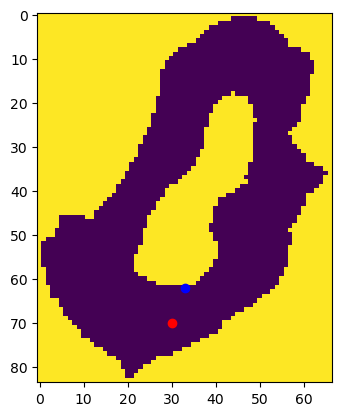

0
(84, 67)


In [199]:
start = (70,30)

plt.imshow(mask, interpolation='nearest', origin='upper')
# plt.axvline(center_x, color='blue')
plt.scatter(start[1], start[0], color='red')

i = 0
plt.scatter(checkpoints[i][1], checkpoints[i][0], color="blue")
# plt.scatter(20,70, color="red")

plt.show()
mask.shape

print(mask[70][20])
print(mask.shape)

In [193]:
def heuristic_(a, b):
    # Chebyshev distance
    (x1, y1) = a
    (x2, y2) = b
    return max(abs(x1 - x2), abs(y1 - y2))

def astar(maze, start, end):
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0),
             (1, 1), (-1, -1), (-1, 1), (1, -1)]
    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic_(start, end)}
    oheap = []
    open_set_hash = set([start])  # To check efficiently if a node is in the open set

    def neighbors_available(position):
        neighbors = []
        for move in moves:
            x_test, y_test = position[0] + move[0], position[1] + move[1]
            if 0 <= x_test < maze.shape[0] and 0 <= y_test < maze.shape[1]:
                if maze[x_test, y_test] != 1:
                    neighbors.append((x_test, y_test))
        return neighbors

    heapq.heappush(oheap, (fscore[start], start))

    while oheap:
        current = heapq.heappop(oheap)[1]
        open_set_hash.remove(current)

        if current == end:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data[::-1]  # Reversing the path

        close_set.add(current)
        for neighbor in neighbors_available(current):
            tentative_g_score = gscore[current] + 1

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in open_set_hash:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic_(neighbor, end)
                if neighbor not in open_set_hash:
                    heapq.heappush(oheap, (fscore[neighbor], neighbor))
                    open_set_hash.add(neighbor)

    return False

def astar_with_checkpoints(maze, start, checkpoints):
    path = []
    current_start = start

    for checkpoint in checkpoints:
        segment = astar(maze, current_start, checkpoint)
        if segment:
            path.extend(segment)
            current_start = checkpoint
        else:
            print(f"Path not found for segment to checkpoint {checkpoint}")
            return None  # Path not found for a segment

    # Optional: return to start
    return_to_start_segment = astar(maze, current_start, start)
    if return_to_start_segment:
        path.extend(return_to_start_segment)

    return path


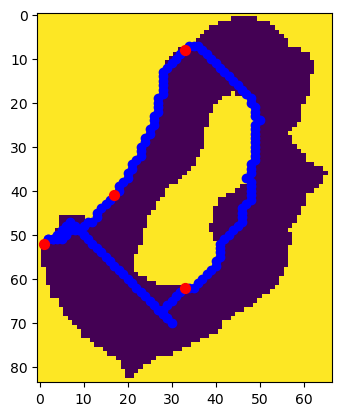

[(70, 30), (69, 29), (68, 28), (67, 27), (66, 26), (65, 25), (64, 24), (63, 23), (62, 22), (61, 21), (60, 20), (59, 19), (58, 18), (57, 17), (56, 16), (55, 15), (54, 14), (53, 13), (52, 12), (51, 11), (50, 10), (49, 9), (48, 8), (47, 7), (48, 6), (49, 5), (50, 4), (51, 3), (51, 2), (52, 1), (51, 2), (51, 3), (51, 4), (51, 5), (50, 6), (49, 7), (49, 8), (49, 9), (48, 10), (47, 11), (47, 12), (46, 13), (45, 13), (44, 14), (43, 15), (42, 16), (41, 17), (40, 18), (39, 18), (38, 19), (37, 20), (36, 20), (35, 21), (34, 21), (33, 22), (32, 23), (31, 23), (30, 23), (29, 24), (28, 24), (27, 25), (26, 25), (25, 26), (24, 26), (23, 26), (22, 27), (21, 27), (20, 27), (19, 27), (18, 28), (17, 28), (16, 28), (15, 28), (14, 28), (13, 28), (12, 29), (11, 30), (10, 31), (9, 32), (8, 33), (7, 34), (7, 35), (7, 36), (8, 37), (9, 38), (10, 39), (11, 40), (12, 41), (13, 42), (14, 43), (15, 44), (16, 45), (17, 46), (18, 47), (19, 48), (20, 48), (21, 49), (22, 49), (23, 49), (24, 50), (25, 49), (26, 49), (27

In [202]:
def maze_plot_with_checkpoints(maze, start, checkpoints):
    # Adjusting the start and checkpoints for the coordinate system of the maze
    # adjusted_start = start[::-1]  # If necessary, adjust this according to your maze's coordinate system
    # adjusted_checkpoints = [checkpoint[::-1] for checkpoint in checkpoints]  # Adjusting checkpoints

    # Using the modified A* function for checkpoints
    full_path = astar_with_checkpoints(maze, start, checkpoints)
    if full_path is None:
        print("Path not found")
        return

    plt.imshow(maze, origin='upper')

    # Plot the path
    for point in full_path:
        plt.scatter(point[1], point[0], color='blue')  # Ensure correct order for x, y plotting

    # Plot the checkpoints
    for checkpoint in checkpoints:
        plt.scatter(checkpoint[1], checkpoint[0], color='red', s=50)  # Mark checkpoints in blue

    plt.show()
    
    # Convert path back to original coordinate system if necessary
    # full_path = [(x[1], x[0]) for x in full_path]
    print(full_path[::-1])  # Print the path in the original coordinate system


maze_plot_with_checkpoints(mask, start, checkpoints)

In [195]:
def maze_plot_with_checkpoints(maze, start, checkpoints):
    # Adjust coordinates for the maze's coordinate system
    adjusted_start = (start[1], start[0])
    adjusted_checkpoints = [(chk[1], chk[0]) for chk in checkpoints]

    # Run A* with adjusted coordinates
    full_path = astar_with_checkpoints(maze, adjusted_start, adjusted_checkpoints)
    if full_path is None:
        print("Path not found")
        return

    plt.imshow(maze, origin='upper')

    # Plot the path
    for point in full_path:
        plt.scatter(point[1], point[0], color='red')

    # Plot the checkpoints
    for checkpoint in adjusted_checkpoints:
        plt.scatter(checkpoint[0], checkpoint[1], color='blue', s=50)

    plt.show()

    # Print the path in the original coordinate system
    full_path_original = [(y, x) for x, y in full_path]  # Swap back to original system if needed
    print(full_path_original[::-1])

maze_plot_with_checkpoints(mask, start, checkpoints)


Path not found for segment to checkpoint (33, 62)
Path not found
